In [3]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
from dotenv import load_dotenv
import os
from pathlib import Path
import nibabel as nib

In [43]:
load_dotenv()
data_dir = Path(os.getenv("BrainMetShare"))
npy_dir = Path(os.getenv("BrainMetShare_npy"))

NameError: name 'mask' is not defined

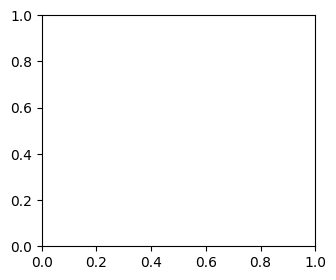

In [5]:
mask_channels = ['necrotic core', 'edema', 'enhancing tumor']
plt.figure(figsize=(12, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(mask[:,:,i], cmap='gray')
    plt.title(mask_channels[i])
    plt.axis('off')
plt.show()

In [44]:
for sub_dir in npy_dir.iterdir():
    if sub_dir.is_dir():
        image = np.load(sub_dir / "image_t1.npy")
        mask = np.load(sub_dir / "mask.npy")
        print(image.shape)
            
        break

(256, 256, 256)


[0 1]
0


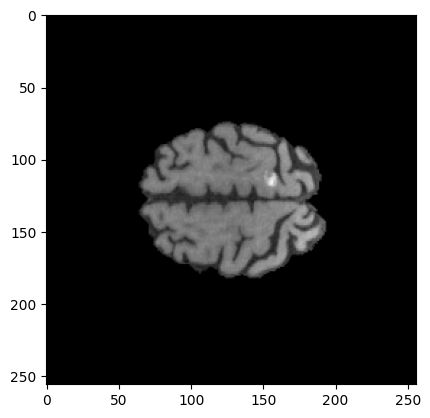

In [46]:
subdir = npy_dir / "Mets_005"
image = np.load(subdir / "image_t1.npy")
mask = np.load(subdir / "mask.npy")
print(np.unique(mask))
slice_sums = mask.sum(axis=(0, 1))
z = int(np.argmax(slice_sums))
plt.imshow(image[:,:,z], cmap='gray')
print(mask.min())

C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-83-4\BCBM-RadioGenomics-83-4_mask_L-ant-temporal-tumor-2.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-83-4\BCBM-RadioGenomics-83-4_mask_L-ant-temporal-tumor.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-83-4\BCBM-RadioGenomics-83-4_mask_L-inf-cerebellar-tumor-2.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-83-4\BCBM-RadioGenomics-83-4_mask_L-inf-cerebellar-tumor.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-83-4\BCBM-RadioGenomics-83-4_mask_L-inf-occipital-tumor.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-83-4\BCBM-RadioGenomics-83-4_mask_L-med-occipital-tumor0.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-83-4\BCBM-RadioGenomics-83-4_mask_L-occipital-tumor00.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-83-4\BCBM-RadioGenomics-83-4_mask_L-occiptal-tumor-2.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-83-4\BCBM-

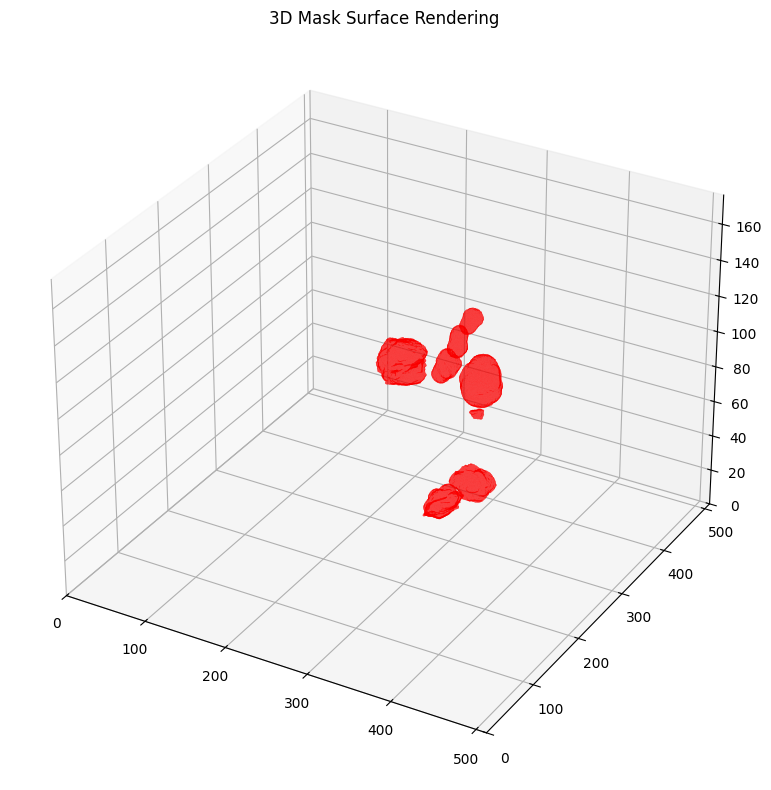

In [26]:
from skimage.measure import marching_cubes
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import napari

cur_dir = data_dir / "BCBM-RadioGenomics-83-4"
mask = None
for file_path in cur_dir.iterdir():
    if "image" not in str(file_path):
        print(file_path)
        cur_mask = nib.load(str(file_path)).get_fdata()
        if mask is None:
            mask = cur_mask
        else:
            mask = mask + cur_mask


# Assume mask is a binary 3D NumPy array (shape: H x W x D)
verts, faces, _, _ = marching_cubes(mask, level=0.5)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

mesh = Poly3DCollection(verts[faces], alpha=0.6)
mesh.set_facecolor('red')
ax.add_collection3d(mesh)

ax.set_xlim(0, mask.shape[0])
ax.set_ylim(0, mask.shape[1])
ax.set_zlim(0, mask.shape[2])
ax.set_title("3D Mask Surface Rendering")
plt.tight_layout()
plt.show()

In [27]:
# Load your 3D mask or image (e.g., shape: (512, 512, 176))
volume = img

# Start viewer
viewer = napari.Viewer()
viewer.add_image(img, name='MRI', colormap='gray', rendering='mip')  # or 'iso', 'attenuated_mip'
cur_dir = data_dir / "BCBM-RadioGenomics-83-4"
for file_path in cur_dir.iterdir():
    if "image" not in str(file_path):
        print(file_path)
        mask = nib.load(str(file_path)).get_fdata()
        mask = (mask > 0).astype(np.uint8)
        viewer.add_labels(mask, name=file_path.stem) 
napari.run()

C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-83-4\BCBM-RadioGenomics-83-4_mask_L-ant-temporal-tumor-2.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-83-4\BCBM-RadioGenomics-83-4_mask_L-ant-temporal-tumor.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-83-4\BCBM-RadioGenomics-83-4_mask_L-inf-cerebellar-tumor-2.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-83-4\BCBM-RadioGenomics-83-4_mask_L-inf-cerebellar-tumor.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-83-4\BCBM-RadioGenomics-83-4_mask_L-inf-occipital-tumor.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-83-4\BCBM-RadioGenomics-83-4_mask_L-med-occipital-tumor0.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-83-4\BCBM-RadioGenomics-83-4_mask_L-occipital-tumor00.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-83-4\BCBM-RadioGenomics-83-4_mask_L-occiptal-tumor-2.nii.gz
C:\Users\yazan\Documents\BCBM_data\BCBM-RadioGenomics-83-4\BCBM-